In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
i=0
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
   ## for filename in filenames:
        #print(filename) # png names
        
        #print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input
/kaggle/input/horses-or-humans-dataset
/kaggle/input/horses-or-humans-dataset/horse-or-human
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/humans
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/humans


In [2]:
train_horses_path = ("/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/")
train_humans_path = ("/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/humans/")
validation_horses_path = ("/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses/")
validation_humans_path = ("/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/humans/")

float32
(300, 300)


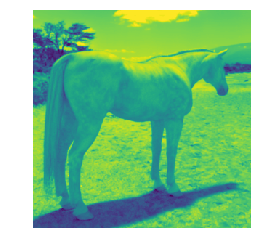

In [3]:
example = img.imread("/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses/horse01-6.png")
example = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY) # this is for create a 2D image matrix.
print(example.dtype)
print(example.shape)
plt.imshow(example)
plt.axis('off')
plt.show()

In [4]:
train_horse = []
train_human = []
valid_horse = []
valid_human = []

# read train horses image dataset
for png in os.listdir(train_horses_path):
    imageread = img.imread(train_horses_path+png)
    imageread = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
    train_horse.append(imageread)
    #print(imgread.shape) # (300, 300)

print(len(train_horse) , "horses images found in train folder.")

500 horses images found in train folder.


In [5]:
# read train humans image dataset
for png in os.listdir(train_humans_path):
    imageread = img.imread(train_humans_path+png)
    imageread = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
    train_human.append(imageread)
    # print(imgread.shape) # (300, 300)
    
print(len(train_human) , "humans images found in train folder.")   

527 humans images found in train folder.


In [6]:
# concatenate our train images dataset
all_train_images = np.concatenate((train_human, train_horse), axis = 0)
print("All train images :",all_train_images.shape) # (1027, 300, 300)  -> this means we have 1027 images and these image 300x300 pixels.
# we do not need this. Only find the total number of images.

All train images : (1027, 300, 300)


In [7]:
# read horses validation datasets.
for png in os.listdir(validation_horses_path):
    imageread = img.imread(validation_horses_path+png)
    imageread = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
    valid_horse.append(imageread)
    #print(imgread.shape) # (300, 300)
print(len(valid_horse), "horses images data for validation.")

128 horses images data for validation.


In [8]:
# read humans validation datasets
for png in os.listdir(validation_humans_path):
    imageread = img.imread(validation_humans_path+png)
    imageread = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
    valid_human.append(imageread)
    #print(imgread.shape) # (300, 300)
print(len(valid_horse), "humans images data for validation.")

128 humans images data for validation.


In [9]:
# concatenate our validation images dataset
all_valid_images = np.concatenate((valid_horse, valid_human), axis = 0)
print("All validation images :",all_valid_images.shape)  # (256, 300, 300) -> we have 256 images for validation.
# we do not need this. Only find the total number of images.

All validation images : (256, 300, 300)


In [10]:
# all images
x_data = np.concatenate((train_human, valid_human, train_horse, valid_horse), axis=0)
print(x_data.shape[0],"images have ",x_data.shape[1],"x",x_data.shape[2],"pixels.")

1283 images have  300 x 300 pixels.


In [11]:
# We create our classify data. 1 for human and 0 for horses. 
zero = np.zeros(len(train_horse) + len(valid_horse)) # all horse images
one = np.ones(len(train_human) + len(valid_human))   # all human images
print("Number of humans images :", one.size)
print("Number of horses images :", zero.size)

Number of humans images : 655
Number of horses images : 628


In [12]:
# Y data
y = np.concatenate((zero, one), axis= 0).reshape(-1,1)
print(y.shape)
# [ 0 - 627] -> 0 -> horse
# [628-1282] -> 1 -> human

(1283, 1)


Now we created our X and Y datas. First read all train humans and horses images datas and concatenate all train datas.
Then do it again for validation datas. Validation is Y and Train is X. 
Now we use X and Y datas and crate our train and test datas.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 42)
# x_train.shape -> (1026, 300, 300)

number_of_train = x_train.shape[0]
number_of_test  = x_test.shape[0]

print("Number of train :", number_of_train)
print("Number of test :", number_of_test)

Number of train : 898
Number of test : 385


Now we have all train and test datas. The train data is (898, 300, 300), this means in train data there are 898 images and these are 300x300 pixels. We need to convert them all to (898, 90000). This is flatten technic. 

In [14]:
# flatten our data
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1] * x_train.shape[2])  # 898, 300*300
x_test_flatten = x_test.reshape(number_of_test, x_test.shape[1] * x_test.shape[2])       # 385, 300*300

print("X train Flatten : ",x_train_flatten.shape)
print("X test Flatten : ",x_test_flatten.shape)
x_train = x_train_flatten
x_test = x_test_flatten

X train Flatten :  (898, 90000)
X test Flatten :  (385, 90000)


    ARTIFICIAL NEEURAL NETWORKS

In [15]:
# import Keras and layers libraries
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
# this function is our classifier function. we make hidden layers in this funcion.
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1])) # first hidden layer
    classifier.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'relu'))   # second hidden layer
    classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))   # third hidden layer
    classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
    #classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
    #classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # last (output) layer
    
    classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
    return classifier

In [17]:
cf = KerasClassifier(build_fn=build_classifier, epochs = 100) # epochs = number of iteration
accuracies = cross_val_score(estimator=cf, X = x_train, y = y_train, cv = 3)
maks = accuracies.max()
variance = accuracies.std()
mean = accuracies.mean()

print("Accuracy max : ", maks)
print("Accuracy variance : ", variance)
print("Accuracy mean : ", mean)

Epoch 1/100
598/598 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4983
Epoch 2/100
598/598 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5351
Epoch 3/100
598/598 [==============================] - 1s 2ms/step - loss: 0.6707 - accuracy: 0.5351
Epoch 4/100
598/598 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.6622
Epoch 5/100
598/598 [==============================] - 1s 1ms/step - loss: 0.4976 - accuracy: 0.7625
Epoch 6/100
598/598 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7274
Epoch 7/100
598/598 [==============================] - 1s 1ms/step - loss: 0.4932 - accuracy: 0.7759
Epoch 8/100
598/598 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.7893
Epoch 9/100
598/598 [==============================] - 1s 2ms/step - loss: 0.4551 - accuracy: 0.7676
Epoch 10/100
598/598 [==============================] - 1s 2ms/step - loss: 0.4292 - accura

Hi everyone. This is my solution. This results mean, max and variance can be chance every run. But not much difference. For example first run we take 0.84 mean and second run we take 0.83 and the third run 0.85 mean. They are close results. 
I tried this code 11 times with changing parameters epochs, number of hidden layers, hidden layer units etc.
I will show you all the results. 

1. 
    * 7 hidden layers and units : 60 - 50 - 40 - 30 - 20 - 10 - 1(output layer)
    * epoch = 100
    * cv = 3
    * activation = "relu"


    * Accuracy max :  0.8600000143051147
    * Accuracy variance :  0.017963577742701624
    * Accuracy mean :  0.8373913168907166


2. 
    * 5 hidden layers and units : 100 - 100 - 100 - 100 - 1(output layer)
    * epoch = 100
    * cv = 3
    * activation = "relu"


    * Accuracy max :  0.8561872839927673
    * Accuracy variance :  0.016486297310804213
    * Accuracy mean :  0.8374135891596476

    * It took a little longer. 5ms/step.


3. 
    * 5 hidden layers and units : 60 - 60 - 60 - 60 - 1(output layer)
    * epoch = 100
    * cv = 3
    * activation = "relu"
    
    
    * Accuracy max :  0.8795986771583557
    * Accuracy variance :  0.01851755188553315
    * Accuracy mean :  0.8541285991668701


4. 
    * 5 hidden layers and units : 60 - 50 - 40 - 30 - 1(output layer)
    * epoch = 100
    * cv = 3
    * activation = "relu"
    
    
    * Accuracy max :  0.8662207126617432
    * Accuracy variance :  0.027488834269085907
    * Accuracy mean :  0.8274135986963908


5. 
    * 5 hidden layers and units : 60 - 50 - 40 - 30 - 1(output layer)
    * *epoch = 50*
    * cv = 3
    * activation = "relu"
    
    
    * Accuracy max :  0.8433333039283752
    * Accuracy variance :  0.03953918337815218
    * Accuracy mean :  0.8151133259137472

6. 
    * 5 hidden layers and units : 60 - 50 - 40 - 30 - 1(output layer)
    * *epoch = 150*
    * cv = 3
    * activation = "relu"
    
    
    * Accuracy max :  0.8695651888847351
    * Accuracy variance :  0.015466893717157856
    * Accuracy mean :  0.8485581278800964


7. 
    * 5 hidden layer and units : 50 - 40 - 30 - 20 - 1(output layer)
    * epochs = 100
    * *cv = 5*
    * activation = "relu"
    
    
    * Accuracy max :  0.8888888955116272
    * Accuracy variance :  0.032781729181184244
    * Accuracy mean :  0.836225950717926


8. 
    * 4 hidden layer and units 50 - 40 - 30 - 1(output layer)
    * epochs = 100
    * cv = 5
    * activation = "relu"
    
    
    * Accuracy max :  0.9166666865348816
    * Accuracy variance :  0.03252429101929113
    * Accuracy mean :  0.8607821345329285


9. 
    * 4 hidden layer and units 150 - 100 - 80 - 1(output layer)
    * epoch = 100
    * cv = 3
    * activation = "relu"
    
    
    * Accuracy max :  0.8566666841506958
    * Accuracy variance :  0.0073748193863788425
    * Accuracy mean :  0.8496581315994263
    * 
    * It takes too much time. 7ms/step.


10. 
    * 3 hidden layer and units : 100 - 80 - 1(output layer)
    * epoch = 50
    * cv 3
    * activation = "relu"
    
    
    * Accuracy max :  0.8494983315467834
    * Accuracy variance :  0.023616515202710592
    * Accuracy mean :  0.816280206044515


**Worst Case:**
11. 
    * 3 hidden layers and their units : 100 - 80 - 1(output layer)
    * epoch = 50
    * cv = 3
    * activation = "tanh"   <------
    
    
    * Accuracy max :  0.5117056965827942
    * Accuracy variance :  0.02871399475215531
    * Accuracy mean :  0.475503534078598

    * I try "tanh" function for see the result. But it is not good for this dataset.

**## CONCLUSION**
*     As I said, every run, this results can be chance. For this results, I run one time. maybe we take different result for second run, I do not know. 
*     But this result help us, compare different parameters, algorithms etc.
*     Thank you for reading.
*     If you have any question, you can ask me every thing.
*     And if youo find any mistake or bugs please tell me.